Heart Disease Prediction using GridSearchCV

In [49]:
## Standard Libraries from data preprocessing and ploting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Models From Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score


In [50]:
df = pd.read_csv(r'D:/PYTHON/heart_disease.csv', sep=";")
print(df.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  


In [51]:
df.shape


(303, 15)

In [52]:
df.tail()


,age,sex,cp,trestbps,cho,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,3.0,3.0,0,0


In [53]:
from sklearn import svm, datasets
print(df.describe())

              age         sex          cp    trestbps         cho         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.683168   
std      0.994971   22.8750

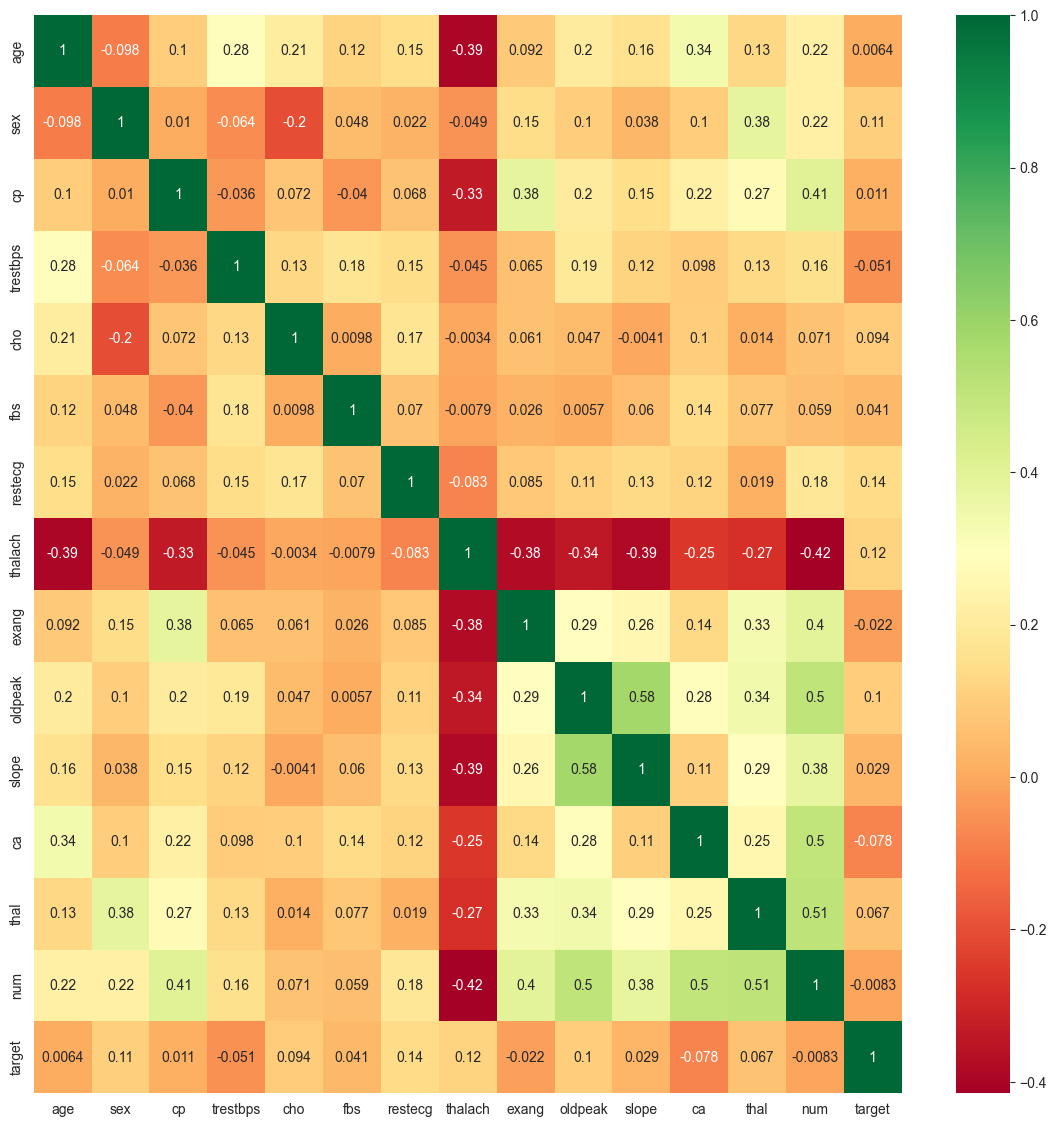

[[<Axes: title={'center': 'age'}> <Axes: title={'center': 'sex'}>
  <Axes: title={'center': 'cp'}> <Axes: title={'center': 'trestbps'}>]
 [<Axes: title={'center': 'cho'}> <Axes: title={'center': 'fbs'}>
  <Axes: title={'center': 'restecg'}> <Axes: title={'center': 'thalach'}>]
 [<Axes: title={'center': 'exang'}> <Axes: title={'center': 'oldpeak'}>
  <Axes: title={'center': 'slope'}> <Axes: title={'center': 'ca'}>]
 [<Axes: title={'center': 'thal'}> <Axes: title={'center': 'num'}>
  <Axes: title={'center': 'target'}> <Axes: >]]


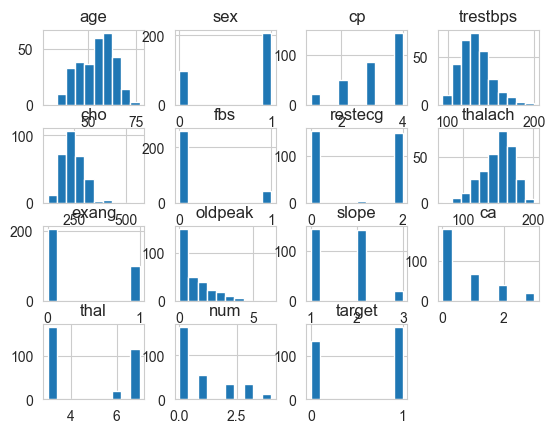

In [54]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,14))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.show()

print(df.hist())
plt.show()



C:\Users\MARSOU\AppData\Local\Temp\ipykernel_44376\860767140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='RdBu_r')


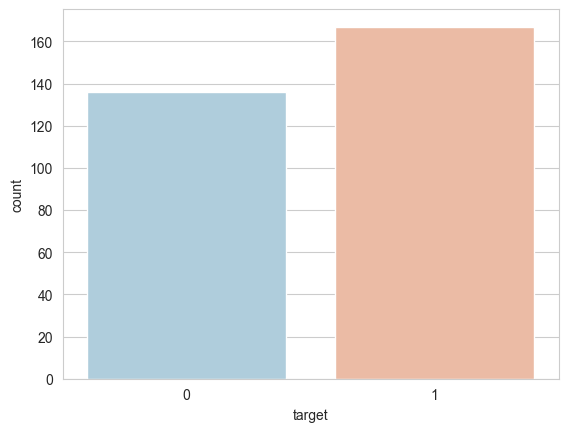

target
1    167
0    136
Name: count, dtype: int64
    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [55]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

print(df['target'].value_counts())

x = df.iloc[:,:-1]
Y = df['target']

print(x.head())
print(Y.head())

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test,Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state= 2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(303, 14)
(242, 14)
(61, 14)


In [57]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'cho', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'target'],
      dtype='object')


Text(0.5, 1.0, 'Male (1) vs Female (0) affected by Heart Diseases')

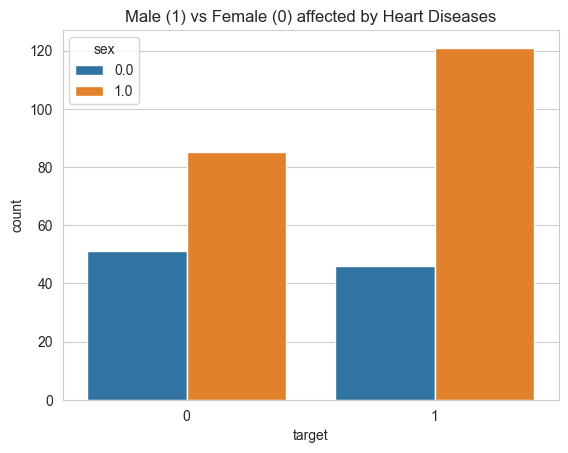

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'target',data = df,hue = 'sex')
plt.title("Male (1) vs Female (0) affected by Heart Diseases")

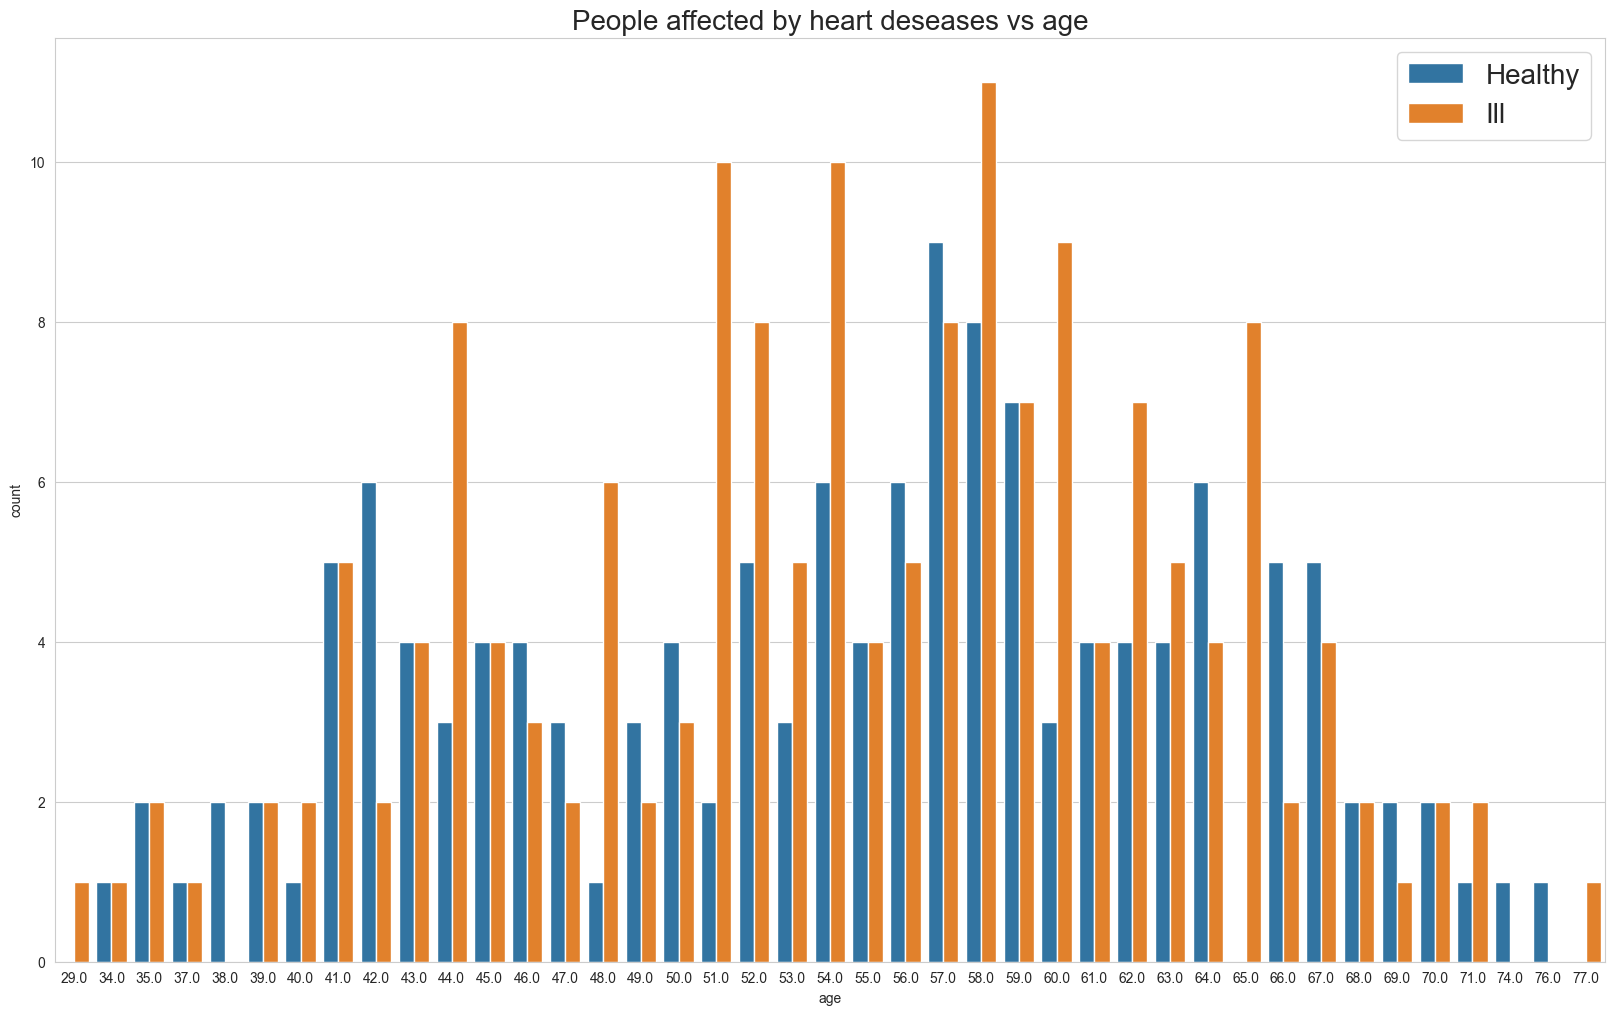

In [59]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'age',hue = 'target',data = df)
plt.title("People affected by heart deseases vs age", fontsize=20)
plt.legend(["Healthy","Ill"], fontsize=20)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1).values
Y = df['target']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [61]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [62]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[21 22]
 [ 8 40]]
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.65      0.83      0.73        48

    accuracy                           0.67        91
   macro avg       0.68      0.66      0.66        91
weighted avg       0.68      0.67      0.66        91



In [63]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[20 23]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.63      0.81      0.71        48

    accuracy                           0.65        91
   macro avg       0.66      0.64      0.63        91
weighted avg       0.66      0.65      0.64        91



In [64]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

[[15 28]
 [20 28]]
              precision    recall  f1-score   support

           0       0.43      0.35      0.38        43
           1       0.50      0.58      0.54        48

    accuracy                           0.47        91
   macro avg       0.46      0.47      0.46        91
weighted avg       0.47      0.47      0.47        91



In [65]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[20 23]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.63      0.81      0.71        48

    accuracy                           0.65        91
   macro avg       0.66      0.64      0.63        91
weighted avg       0.66      0.65      0.64        91



In [66]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[20 23]
 [14 34]]
              precision    recall  f1-score   support

           0       0.59      0.47      0.52        43
           1       0.60      0.71      0.65        48

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.58        91
weighted avg       0.59      0.59      0.59        91



In [67]:
from itertools import product
import itertools
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [68]:
# Load sample data
data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Create an instance of XGBClassifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [69]:
X= df.drop("target",axis=1)

y= df["target"]

In [70]:
x

,age,sex,cp,trestbps,cho,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [71]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [72]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [73]:
X_train

,age,sex,cp,trestbps,cho,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0,0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,2
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0,1


In [74]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [75]:
# Put models in a dictionary

models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models.
    mdels: a dictionay of different Scikit_learn Machine Learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    
    """
    np.random.seed(42)
    # make a dictionary to keep model scores

    model_scores= {}
    # Loop through models
    for name, model in models.items():
         model.fit(X_train,y_train)
         model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [76]:
model_scores= fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

c:\Users\MARSOU\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6885245901639344,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.6557377049180327}

<Axes: >

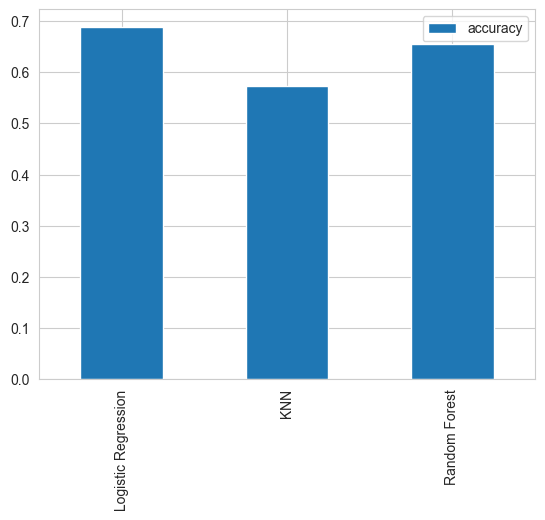

In [77]:
model_compare = pd.DataFrame( model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Hyperparameter Tuning

In [78]:
# For KNN

train_scores=[]
test_scores=[]

neighbors= range(1,21)

knn =KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [79]:
train_scores

[1.0,
 0.7479338842975206,
 0.7479338842975206,
 0.7148760330578512,
 0.6818181818181818,
 0.6694214876033058,
 0.6528925619834711,
 0.6446280991735537,
 0.6446280991735537,
 0.6157024793388429,
 0.628099173553719,
 0.5867768595041323,
 0.6115702479338843,
 0.5578512396694215,
 0.5867768595041323,
 0.5785123966942148,
 0.6033057851239669,
 0.5537190082644629,
 0.5826446280991735,
 0.5743801652892562]

In [80]:
test_scores

[0.5573770491803278,
 0.4918032786885246,
 0.5737704918032787,
 0.5573770491803278,
 0.5737704918032787,
 0.5573770491803278,
 0.6065573770491803,
 0.5245901639344263,
 0.5573770491803278,
 0.5409836065573771,
 0.5901639344262295,
 0.5245901639344263,
 0.5409836065573771,
 0.5245901639344263,
 0.5409836065573771,
 0.5901639344262295,
 0.5737704918032787,
 0.5573770491803278,
 0.5409836065573771,
 0.5573770491803278]

Maximum KNN score on the test data: 60.66%


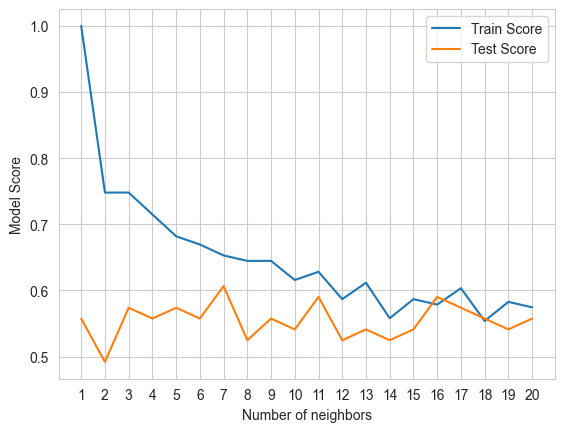

In [81]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Using RandomizedSearchCV

In [82]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}

random_re_grid={"n_estimators": np.arange(10,1000,50),
               "max_depth" :[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf": np.arange(1,20,2)}

In [83]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [84]:
rs_log_reg.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(29.763514416313132)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [85]:
rs_log_reg.score(X_test,y_test)

0.6721311475409836

In [86]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_re_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [87]:
rs_rf.best_params_

{'n_estimators': np.int64(910),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(1),
 'max_depth': 10}

In [88]:
rs_rf.score(X_test,y_test)

0.6229508196721312

Using GridsearchCV

In [89]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [90]:
gs_log_reg.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [91]:
gs_log_reg.score(X_test,y_test)

0.6885245901639344